# Requirements

In [12]:
# Add as many imports as you need.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [2]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('climate-data.csv')
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Explore the dataset using visualizations of your choice.

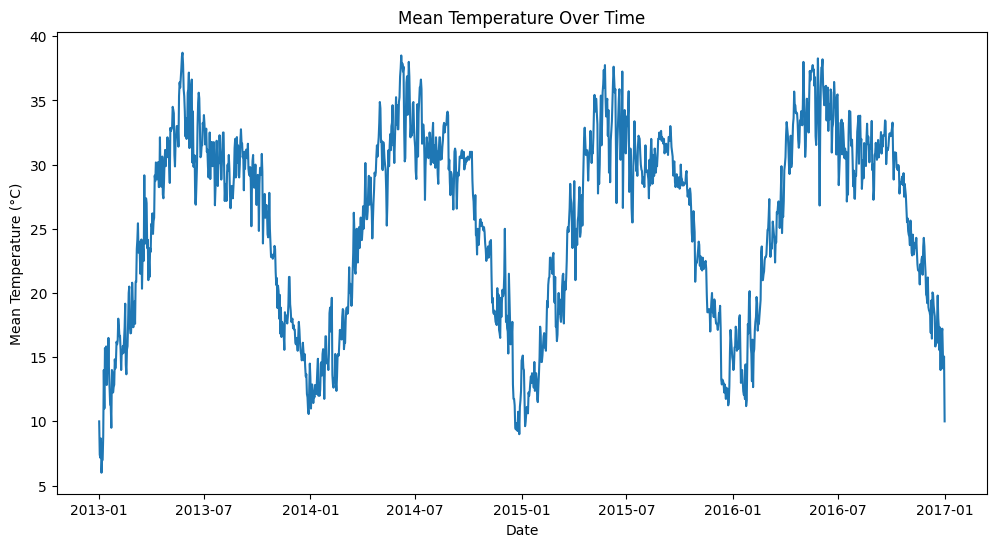

In [3]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(data['date']), data['meantemp'])
plt.title('Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.show()

In [4]:
data.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
features = [col for col in data.columns if col not in ['date']]
features

['meantemp', 'humidity', 'wind_speed', 'meanpressure']

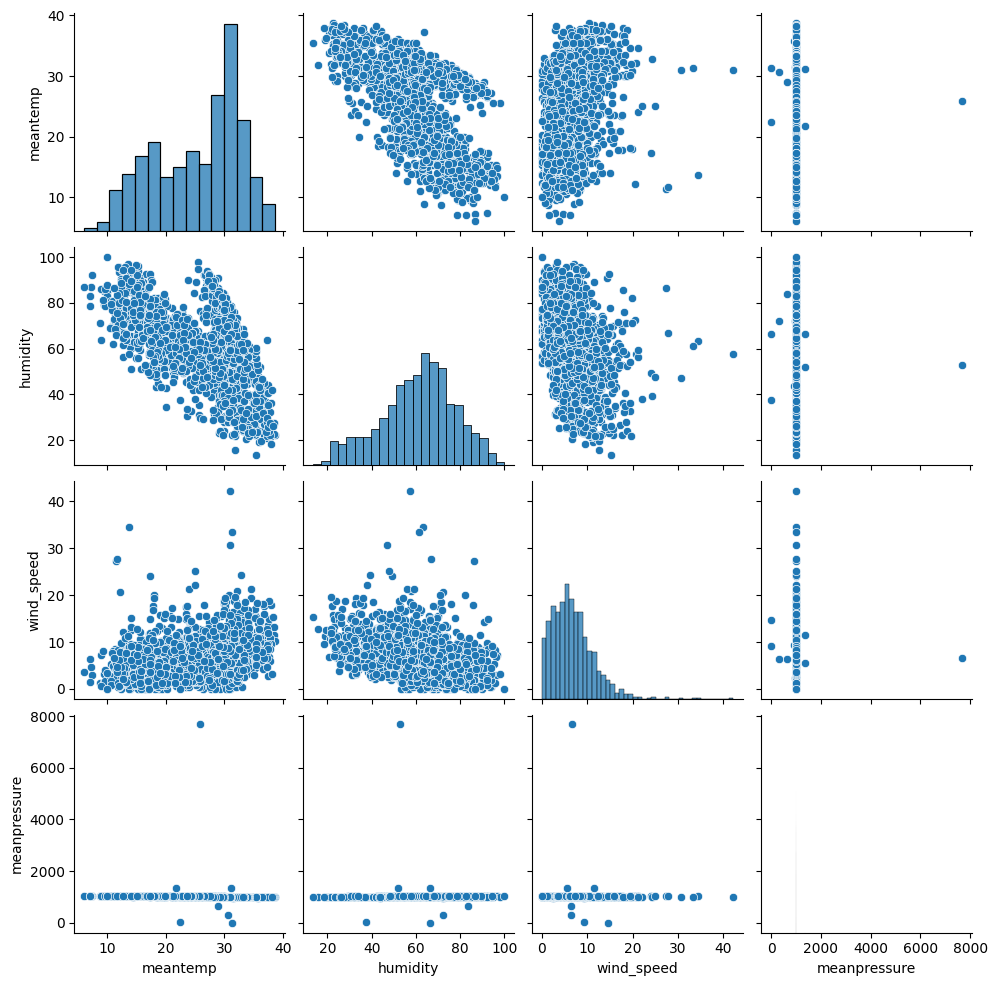

In [7]:
sns.pairplot(data[features])
plt.show()

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [8]:
# Write your code here. Add as many boxes as you need.
for lag in range(1, 4):
    for col in features:
        data[f'{col}_lag{lag}'] = data[col].shift(lag)

data = data.dropna().reset_index(drop=True)
data.head()

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_lag1,humidity_lag1,wind_speed_lag1,meanpressure_lag1,meantemp_lag2,humidity_lag2,wind_speed_lag2,meanpressure_lag2,meantemp_lag3,humidity_lag3,wind_speed_lag3,meanpressure_lag3
0,2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667
1,2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000
2,2013-01-06,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667
3,2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667
4,2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [13]:
# Write your code here. Add as many boxes as you need.
features = [col for col in data.columns if col not in ['date', 'meantemp', 'humidity','wind_speed','meanpressure']]
target = 'meantemp'

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [14]:
# Write your code here. Add as many boxes as you need.
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Use the trained model to make predictions for the test set.

In [15]:
# Write your code here. Add as many boxes as you need.
y_pred_rfr = rfr_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [19]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred_rfr)
mse = mean_squared_error(y_test, y_pred_rfr)
print(f'Random Forest - MSE: {mse:.4f}')
print(f'Random Forest - R2 Score: {r2:.4f}')

Random Forest - MSE: 3.0457
Random Forest - R2 Score: 0.9049


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [20]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Use the trained model to make predictions for the test set.

In [21]:
# Write your code here. Add as many boxes as you need.
y_pred_xgb = xgb_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [22]:
# Write your code here. Add as many boxes as you need.
r2 = r2_score(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
print(f'Random Forest - MSE: {mse:.4f}')
print(f'Random Forest - R2 Score: {r2:.4f}')

Random Forest - MSE: 4.0620
Random Forest - R2 Score: 0.8732


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [23]:
# Write your code here. Add as many boxes as you need.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=42)

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [24]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

param_grid = {
    'n_estimators':[50,100,150,200]
}
tcv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42),param_grid=param_grid,cv=tcv,scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
print(f'Best n_estimators: {best_n_estimators}')

Best n_estimators: 50


## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [25]:
# Write your code here. Add as many boxes as you need.
final_xgb_model = XGBRegressor(n_estimators=best_n_estimators, random_state=42)
final_xgb_model.fit(X_train, y_train)

y_pred_final = final_xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
print(f'Random Forest - MSE: {mse:.4f}')
print(f'Random Forest - R2 Score: {r2:.4f}')

Random Forest - MSE: 2.4284
Random Forest - R2 Score: 0.9254
